In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')

from sklearn.cluster import KMeans

In [16]:
data = pd.read_csv('/content/drive/MyDrive/2202-02/ 산학프로젝트Ⅱ/9주차/airbnb.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [6]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [25]:
df = data[['latitude','longitude']]
df

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


In [26]:
wcss = []

for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(df)
    wcss.append(kmeans.inertia_)

In [27]:
wcss

[249.55369013357893,
 155.83309085167502,
 108.83110940896404,
 78.54228351767658,
 61.9990834102309,
 53.506954139022184,
 46.4953029851343,
 39.899622247091614,
 35.27995877387485,
 30.8004929803665,
 27.1902502681115,
 24.140981052137327,
 21.903214890761998,
 20.03803729321777,
 18.537625752630316,
 17.40478249822717,
 16.256069819368225,
 15.163320564222893,
 14.138473388580362,
 13.30325257866394]

In [28]:
pd.DataFrame(wcss)

,0
0,249.553690
1,155.833091
2,108.831109
3,78.542284
4,61.999083
5,53.506954
6,46.495303
7,39.899622
8,35.279959
9,30.800493


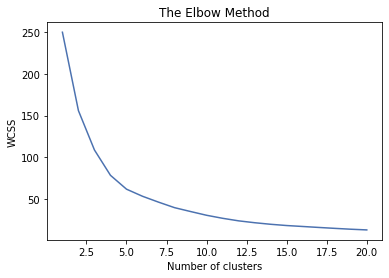

In [29]:
plt.figure()
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
k = 5
kmeans = KMeans(n_clusters = k)
y_kmeans = kmeans.fit_predict(df)

In [31]:
y_kmeans

array([0, 4, 1, ..., 1, 4, 4], dtype=int32)

In [32]:
pred_cluster=pd.DataFrame(y_kmeans)

In [33]:
pred_cluster.columns=['predict']

In [34]:
full_data=pd.concat([df, pred_cluster], axis=1)

In [35]:
full_data

,latitude,longitude,predict
0,40.64749,-73.97237,0
1,40.75362,-73.98377,4
2,40.80902,-73.94190,1
3,40.68514,-73.95976,2
4,40.79851,-73.94399,1
...,...,...,...
48890,40.67853,-73.94995,2
48891,40.70184,-73.93317,2
48892,40.81475,-73.94867,1
48893,40.75751,-73.99112,4


In [36]:
kmeans_pred = KMeans(n_clusters=k, random_state=42).fit(df)

In [37]:
kmeans_pred.cluster_centers_

array([[ 40.80473038, -73.93858686],
       [ 40.69777062, -73.93737789],
       [ 40.73984184, -73.98675669],
       [ 40.65377909, -73.98439536],
       [ 40.71020537, -73.81929658]])

In [38]:
kmeans_pred.predict([[100, 50], [30, 80]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([4, 4], dtype=int32)

In [39]:
labels = [('Cluster ' + str(i+1)) for i in range(k)]

In [40]:
labels

['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

In [41]:
X=np.array(df)

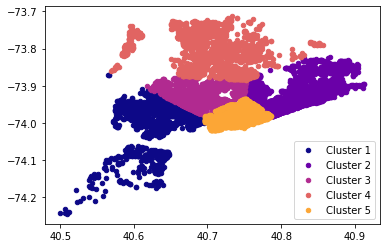

In [42]:
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 20,
                 c = cmap(i/k), label = labels[i])
plt.legend()

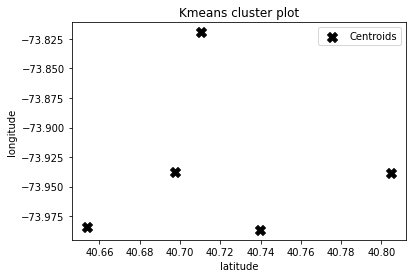

In [44]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids', marker = 'X')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

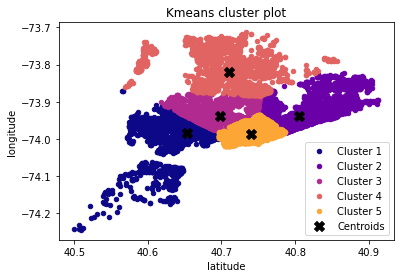

In [45]:
plt.figure()
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 20,
                 c = cmap(i/k), label = labels[i])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids', marker = 'X')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Kmeans cluster plot')
plt.legend()
plt.show()

In [ ]:
# 범주형 데이터는 고정된 것이기 때문에 k-means 사용 안 함